# Modelo de regresión lineal

Se puede definir al modelo de regresión lineal como una función $f(x)$ con polinomio de grado 1 y que se puede esquematizar de la siguiente manera:  

$$ y = \alpha + \beta (x)$$

Donde $y$ seria la variable dependiente, $x$ la variable independiente, $\beta$ la pendiente o inclinación de la recta y $\alpha$ el corte con el eje.  

Inicialmente vamos a considerar el error, como la diferencia entre el dato real y el valor estimado:  
$$e_i = (y_i - Y_e(x_i))$$

El objetivo es minimizar la suma de los errores al cuadrado (**técnica de minimos cuadrados**) sobre los puntos de un data set:
$$ min \sum_{i = 1}^{n} e_i^{2} = \sum_{i = 1}^{n} (y_i - Y_e(x_i))^2 = \sum_{i = 1}^{n} (y_i - (\alpha + \beta*x_i))^2$$

Utilizando el cálculo diferencial, se puede estimar que los valores de $\beta$ y $\alpha$ pueden hallarse de la siguiente manera:  

$$\beta = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} = \frac{Cov(x,y)}{Var(x,y)}$$  
$$\alpha = \bar{y} - \beta*\bar{x}$$

Donde $\bar{x}, \bar{y}$ representan las medias respectivas de cada variable

Aunque usualmente, el modelo lineal no puede explicar en un 100% la distribución de probabilidad de un data set. Es por esto, que a nuestra ecuación que explica el modelo siempre debemos adicionarle un parametro que estima el error:  
$$ y = \alpha + \beta (x) + E$$


### Ejercicio
#### Modelo con datos simulados

* $y = a + b*x$
* x : 100 valores distribuidos según N(1.5, 2.5)

* Ye = 8 + 0.6 * x + e --> estimación del modelo
* e: Estará distribuido según una normal N(0, 0.8)

In [3]:
import pandas as pd
import numpy as np

In [4]:
x = 1.5 + 2.5 * np.random.randn(100)

In [5]:
residuos = 0 + 0.8*np.random.randn(100)

In [6]:
y_estim = 8 + 0.6*x

In [7]:
y_actual = 8 + 0.86*x + residuos

In [8]:
x_lista = x.tolist()
y_estim_list = y_estim.tolist()
y_actual_lista = y_actual.tolist()

In [9]:
dataframe = pd.DataFrame(
    {
        "x": x_lista,
        "y_actual": y_actual_lista,
        "y_predicc": y_estim_list
    }

)

In [10]:
dataframe.head()

,x,y_actual,y_predicc
0,0.663995,8.982391,8.398397
1,0.226168,9.328693,8.135701
2,0.259678,8.140074,8.155807
3,1.006597,9.276107,8.603958
4,1.787994,8.469635,9.072797


In [11]:
import matplotlib.pyplot as plt

In [12]:
y_mean = [np.mean(y_actual) for i in range(1, len(x_lista)+ 1)]

Text(0.5, 1.0, 'Valor actual Vs. Predicción')

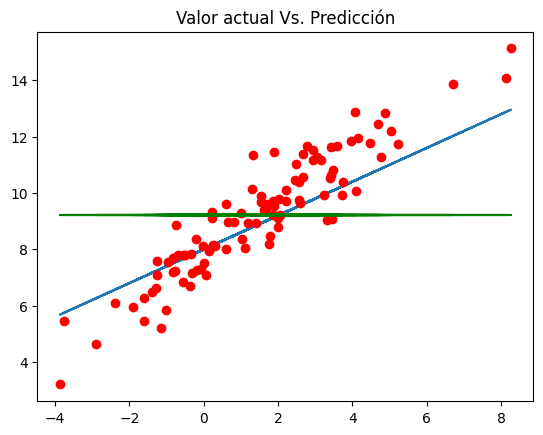

In [13]:
%matplotlib inline
plt.plot(x, y_estim)
plt.plot(x, y_actual, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual Vs. Predicción")

Sin embargo, se pueden observar puntos que se alejan de la recta estimada del modelo. Son datos conocidos como datos observados (**y_actual**). El desplazamiento de los puntos observados con respecto a la recta del modelo (y_estim) es conocido como **SSD** (suma de la diferencia de los cuadrados). Adicionalmente, observamos que tambien existe una separación entre los puntos observados y la respectiva recta de las medias trazada en color verde. Esta distancia se conoco como **SST** (suma de los cuadrados totales). Y por ultimo, tenemos la distancia que se halla entre la recta estimada y la recta de los promedios (Recta azul y recta verde respectivamente). A esta diferencia se le conoce como **SSR** (suma de los cuadrados de la regresión).

$$ SST = SSR + SSD $$
$$ R^2 = \frac{SSR}{SST} $$

In [14]:
dataframe["SSR"]= (dataframe["y_predicc"] - np.mean(y_actual))**2
dataframe["SSD"]= (dataframe["y_predicc"]-dataframe["y_actual"])**2
dataframe["SST"]= (dataframe["y_actual"]-np.mean(y_actual))**2

In [15]:
dataframe.head()

,x,y_actual,y_predicc,SSR,SSD,SST
0,0.663995,8.982391,8.398397,0.675595,0.341049,0.056621
1,0.226168,9.328693,8.135701,1.176449,1.423230,0.011740
2,0.259678,8.140074,8.155807,1.133237,0.000248,1.166980
3,1.006597,9.276107,8.603958,0.379931,0.451785,0.003110
4,1.787994,8.469635,9.072797,0.021770,0.363803,0.563562


In [16]:
SSR = sum(dataframe["SSR"])
SSD = sum(dataframe["SSD"])
SST = sum(dataframe["SST"])

In [17]:
SSR

197.77479873218232

In [18]:
SSD

110.67668422651859

In [19]:
SST

456.02440392088937

In [20]:
r2 = SSR/SST

In [21]:
r2

0.4336934537531726

El modelo se ajusta de acuerdo al comportamiento de los datos

(array([ 4.,  7., 14., 15., 22., 16., 15.,  2.,  3.,  2.]),
 array([-2.56473925, -2.06053239, -1.55632553, -1.05211867, -0.54791181,
        -0.04370495,  0.4605019 ,  0.96470876,  1.46891562,  1.97312248,
         2.47732934]),
 <BarContainer object of 10 artists>)

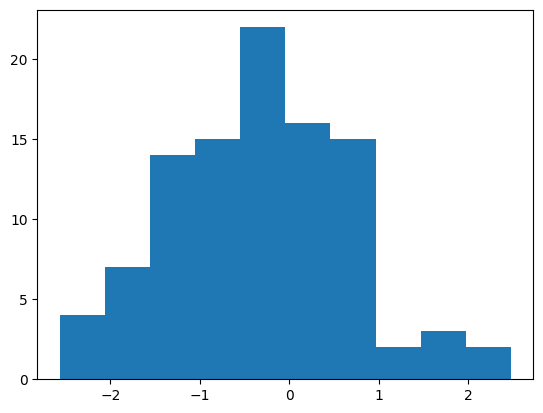

In [22]:
plt.hist(dataframe["y_predicc"]-dataframe["y_actual"])

## Obteniendo la recta de regresión

In [23]:
x_mean = np.mean(dataframe["x"])
y_mean = np.mean(dataframe["y_actual"])
x_mean, y_mean

(1.4847428994565148, 9.220343056906659)

In [24]:
dataframe["beta_n"] = (dataframe["x"]-x_mean)*(dataframe["y_actual"]-y_mean)
dataframe["beta_d"] = (dataframe["x"]-x_mean)**2

In [25]:
beta = sum(dataframe["beta_n"])/sum(dataframe["beta_d"])

In [26]:
alpha = y_mean - beta * x_mean

In [27]:
alpha, beta

(7.926089668454242, 0.8717020225698159)

EL modelo obtenido por regresión es:  
$$ y = 8.05222622741971 + 0.7985107375816947*x$$

In [28]:
dataframe["y_modelo"] = alpha + beta*dataframe["x"]

In [29]:
dataframe.head()

,x,y_actual,y_predicc,SSR,SSD,SST,beta_n,beta_d,y_modelo
0,0.663995,8.982391,8.398397,0.675595,0.341049,0.056621,0.195298,0.673627,8.504896
1,0.226168,9.328693,8.135701,1.176449,1.423230,0.011740,-0.136366,1.584010,8.123241
2,0.259678,8.140074,8.155807,1.133237,0.000248,1.166980,1.323399,1.500784,8.152452
3,1.006597,9.276107,8.603958,0.379931,0.451785,0.003110,-0.026663,0.228624,8.803542
4,1.787994,8.469635,9.072797,0.021770,0.363803,0.563562,-0.227653,0.091961,9.484688


In [30]:
SSR = sum((dataframe["y_modelo"]-y_mean)**2)
SSD = sum ((dataframe["y_modelo"]-dataframe["y_actual"])**2)
SST = sum((dataframe["y_actual"]-y_mean)**2)

In [31]:
SSR, SSD, SST

(394.5341648463656, 61.490239074524, 456.02440392088937)

In [32]:
r2_ajustado = SSR/SST
r2_ajustado

0.8651602007571705

## El p valor

Para comprobar la existencia de una relación lineal, planteamos el contraste de hipótesis.

$$
\left.
H_0 : \beta = 0 \atop
H_a : \beta \neq 0 
\right\}
$$

### Error estándar residual (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(dataframe)-2))
RSE

0.7921183113195881

### Implementando la regresión lineal con statsmodel y sklearn

#### Con statsmodel

In [34]:
import statsmodels.formula.api as smf

In [35]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Utilizamos el metodo ols, e indicamos en el parametro formula, los campos que queremos evaluar.

In [36]:
linear_model = smf.ols(formula= "Sales~TV", data=data).fit()
linear_model

El método fit, nos permite encontrar la recta que mejor se ajusta, teniendo en cuenta la minimización de la suma del cuadrado de los errores.

In [37]:
linear_model.params

Intercept    7.032594
TV           0.047537
dtype: float64

Los parametros arrojados por el modelo, nos permiten construir una ecuación que representa la regresión lineal:

$$Sales = 7.032594 + 0.047537\cdot TV$$

Ahora miremos los p-values de este modelo, para validar el nivel de significancia.

In [38]:
linear_model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Los p-values con valores tan pequeños indicarian que se rechaza la hipotesis nula, cuando la media es igual a 0

In [39]:
linear_model.rsquared

0.611875050850071

In [40]:
linear_model.rsquared_adj

0.6099148238341623

Para realizar un resumen de todos los estadisticos:

In [41]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.47e-42
Time:                        14:57:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ahora vamos usar el modelo para intentar realizar una predicción de ventas.

In [42]:
sales_prediction = linear_model.predict(pd.DataFrame(data['TV']))
sales_prediction

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

Ahora, realizaremos una representación gráfica para validar el ajuste de la predicción, con los datos reales.

Text(5, -45, '$y = 7.0326 + 0.0475 \\cdot TV$')

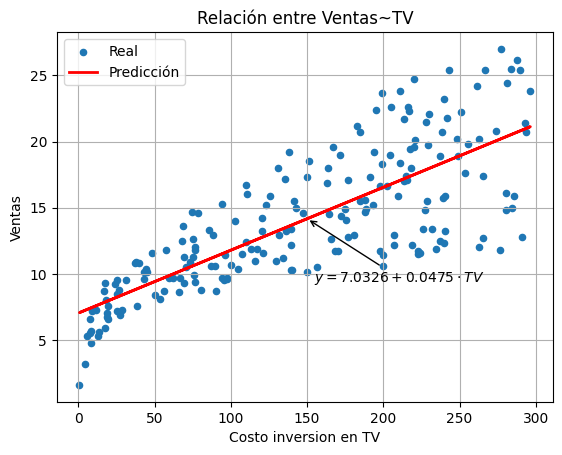

In [43]:
data.plot(kind='scatter', x = 'TV', y = 'Sales', label = 'Real')
plt.plot(pd.DataFrame(data.TV), sales_prediction, color='red', lw = 2, label = 'Predicción')
plt.title('Relación entre Ventas~TV')
plt.xlabel('Costo inversion en TV')
plt.ylabel('Ventas')

plt.legend(loc = 'upper left')

plt.grid()
plt.annotate(r'$y = 7.0326 + 0.0475 \cdot TV$', xy = (150, 7.0326+(150*0.0475)), xycoords='data', xytext=(5, -45), textcoords='offset points', 
             arrowprops= dict(arrowstyle = '->'))

Vamos a incorporar los datos de la predicción en el dataset original.

In [44]:
data['prediccion_venta'] = 7.032594 + 0.047537*data['TV']
data['RSE'] = (data['Sales']-data['prediccion_venta'])**2
SSD = sum(data['RSE'])
RSE = np.sqrt(SSD/(len(data)-2))
SSD, RSE

(2102.5305838896525, 3.258656369238098)

In [45]:
data.head()

,TV,Radio,Newspaper,Sales,prediccion_venta,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147990,1.567528
2,17.2,45.9,69.3,9.3,7.850230,2.101832
3,151.5,41.3,58.5,18.5,14.234450,18.194921
4,180.8,10.8,58.4,12.9,15.627284,7.438076


Con el valor de los residuos, vamos a hallar el promedio de los mismos,

In [46]:
sales_m = np.mean(data['Sales'])
error = RSE/sales_m
error

0.23238768901680143

Encontramos un error del 23% de los datos que no puede ser explicado por el modelo

Dibiujemos la distribución de los errores

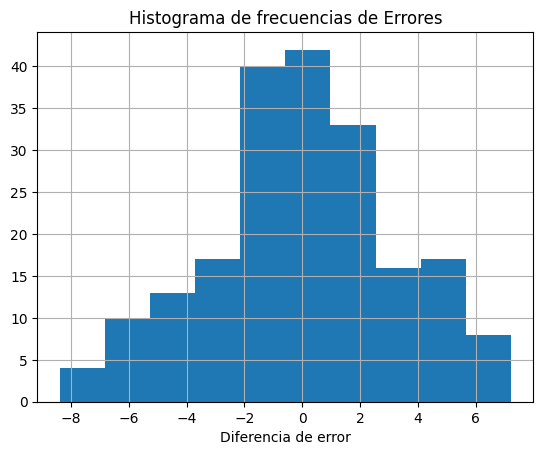

In [47]:
plt.hist(data['Sales']-data['prediccion_venta'])
plt.title('Histograma de frecuencias de Errores')
plt.xlabel('Diferencia de error')

plt.grid()
plt.show()

## Regresión lineal múltiple con statsmodels

Al evidenciar algunos de los estadisticos, como el error residual, que no explica un 23% del modelos, es necesario acudir a la evaluación de alguna de las otras variables independientes para moder mejorar el comportamiento del modelo de regresión lineal.

* Sales ~ TV
* Sales ~ Newspaper
* Sales ~ Radio
* Sales ~ TV ~ Newspaper
* Sales ~ TV ~ Radio
* Sales ~ Periodico ~ Radio
* Sales ~ TV~Periodico ~ Radio

Hay que tener en cuenta que entre mas variables predictoras puedan intervenir en el modelo, mayor sera la complejidad de escenarios que deberán ser tenidos en cuenta para formular un modelo de regresión. Afortunadamente, pandas cuenta con una funcionalidad que nos permite identificar las correlaciones fuertes entre las variables predictoras y las variables a predecir.

In [48]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [49]:
correlaciones  = data[['Sales', 'TV', 'Newspaper', 'Radio']].corr()
correlaciones.style.background_gradient(cmap='coolwarm') ## otras gamas de colores RdYlGn o bwr o PuOr

,Sales,TV,Newspaper,Radio
Sales,1.000000,0.782224,0.228299,0.576223
TV,0.782224,1.000000,0.056648,0.054809
Newspaper,0.228299,0.056648,1.000000,0.354104
Radio,0.576223,0.054809,0.354104,1.000000


Podemos evidencias que las dos variables predictoras que mas aportan al modelo son la **TV** y la **Radio**. Por otro lado, el periodoco al tener una correlación debil, podria ser una candidata para descarte dentro de nuestro modelo.

In [50]:
linear_model_2 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [51]:
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           4.83e-98
Time:                        14:57:54   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Probaremos con la newspaper tambien

In [52]:
linear_model_3 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [53]:
linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           3.95e-45
Time:                        14:57:54   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
linear_model_2.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

Podemos evidencias notoriamente que el modelo que incluyó al periodico y la televisión no aportó lo suficiente al modelo como para reducier es estistico R. Por lo tanto, comprobamos que el modelo mas optimo tendria en cuenta las variables predictoras **TV y radio**.

Nuestro modelo seria:

$$ sales = 2.921100 + (0.045755 \cdot TV) + (0.187994 \cdot Radio)$$

Y nuestras predicciones serian:

In [55]:
sales_prediction_2 = linear_model_2.predict(data[['TV', 'Radio']])
sales_prediction_2

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [56]:
SSD = sum((data['Sales'] - sales_prediction_2)**2)
SSD

556.9139800676184

In [57]:
RSE =np.sqrt(SSD/(len(data)-2-1))
RSE

1.681360912508001

Hemos disminuido considerablemente el valor del error residual del modelo de 3.25 a 1.68. Ahora calculemos el porcetaje que representaria

In [58]:
error = RSE/sales_m
error

0.1199045043685506

Tenemos un 11% de error que no es explicado por el modelo.

### Multicolinealidad

Esta es la razon por la cual no se agraga el periodico al modelo. Podemos evidenciar esto en la matriz de correlaciones de las variables predictoras.

Vamos a utilizar el factor de inflacion de la varianza (VIF) para validar los comportamientos de colinealidad entre variables predictoras. Este factor debe calcularse para cada una de las variables, y si este es muy alto, este predictor deberá ser eliminado del modelo.

Si VIF = 1, las variables no estan correlacionadas; si es menor que 5, las variables tienen una correlacion moderada y se pueden quedar en el modelo. Si es el caso de que el vif es mayor que 5, las variables estaran altamente correlacionadas, y deben ser eliminadas del modelo.

In [59]:
# newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_np = smf.ols(formula='Newspaper~TV+Radio', data= data).fit()
rsquared_np = lm_np.rsquared
vif = 1/(1-rsquared_np)
vif

1.1451873787239288

In [60]:
# Tv ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula='TV~Newspaper+Radio', data= data).fit()
rsquared_tv = lm_tv.rsquared
vif_tv = 1/(1-rsquared_tv)
vif_tv

1.00461078493965

In [61]:
# Radio ~ Newspaper + Tv -> R^2 VIF = 1/(1-R^2)
lm_radio = smf.ols(formula='Radio~Newspaper+TV', data= data).fit()
rsquared_radio = lm_radio.rsquared
vif_radio = 1/(1-rsquared_radio)
vif_radio

1.1449519171055353

Es evidente que la radio y el periodico tienen un vif similar, por lo cual se puede concluir que estas dos estan correlacionadas, por lo tanto, una de estas puede ser candidata a eliminar, de acuerdo con la precision que aporten al modelo, como ya lo comprobamos anteriormente.

## Validando el modelo
### Dividir en conjunto de entrenamiento y conjunto de test

Aconsejable realizar este proceso al iniciar el proyecto.

In [62]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


(array([ 2.,  2.,  8., 13., 40., 41., 33., 34., 18.,  9.]),
 array([-3.41772533, -2.84960901, -2.28149269, -1.71337636, -1.14526004,
        -0.57714372, -0.00902739,  0.55908893,  1.12720525,  1.69532158,
         2.2634379 ]),
 <BarContainer object of 10 artists>)

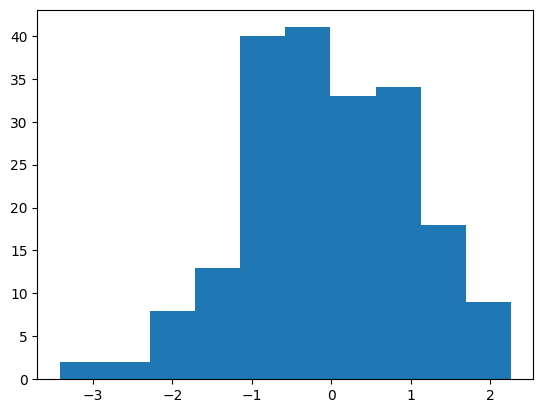

In [63]:
a = np.random.randn(len(data))
plt.hist(a)

In [64]:
check = (a <0.8)
training = data[check]
test = data[~check]
len(training), len(test)

(158, 42)

In [65]:
linear_model_2 = smf.ols(formula="Sales~TV+Radio", data = training).fit()
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     664.5
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           9.24e-77
Time:                        14:57:55   Log-Likelihood:                -306.33
No. Observations:                 158   AIC:                             618.7
Df Residuals:                     155   BIC:                             627.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9043      0.333      8.714      0.000       2.246       3.563
TV             0.0468      0.002     30.142      0.000       0.044       0.050
Radio          0.1806      0.009     19.136      0.000       0.162       0.199
==============================================================================
Omnibus:                       51.920   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.562
Skew:                          -1.378   Prob(JB):                     1.21e-28
Kurtosis:                       6.455   Cond. No.                         418.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo lineal resultante:

$$sales = 2.9490 + (0.0452 \cdot TV) + (0.1900 \cdot Radio)$$

#### Validacion con el conjunto de testing

In [66]:
sales_prediction = linear_model_2.predict(test)
sales_prediction

1      12.082868
25     15.828013
28     19.431214
32      7.719683
34      7.631491
36     23.293669
44      8.719529
57     12.739904
58     21.718326
61     22.833175
64     16.763889
69     20.969363
81     14.856367
83     14.139464
88     11.638248
89     16.671090
91      4.512371
99     16.756907
102    17.828889
111    21.067926
113    16.424490
120    14.350995
122    13.810617
139    19.477917
141    18.354153
157    10.142811
159    12.385022
161    13.376986
163    17.195044
166    10.532177
168    17.237496
169    18.110886
170     7.337078
171    14.370076
173    12.059978
174    13.916422
182     6.561344
185    20.634402
191     8.384811
196     8.193500
197    12.859406
198    23.749357
dtype: float64

In [67]:
SSD = sum((test['Sales']-sales_prediction)**2)
SSD

113.99452637893665

In [68]:
RSE= np.sqrt(SSD/(len(test)-2-1))
RSE

1.7096597830617903

In [69]:
sales_mean =  np.mean(test['Sales'])
error = RSE/sales_mean
error

0.1148891374217523

# Regresion linea con sklearn

In [70]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [71]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [72]:
feature_columns = ['TV', 'Radio', 'Newspaper']
X = data[feature_columns]
Y = data['Sales']

In [73]:
estimator = SVR(kernel='linear')
selector = RFE(estimator, n_features_to_select=2, step=1) # 2 es el numero de variables predictoras
selector = selector.fit(X, Y)

Columnas seleccionadas:

In [74]:
selector.support_

array([ True,  True, False])

Se toman por orden las columnas TV y Radio.

In [75]:
selector.ranking_

array([1, 1, 2])

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
X_pred = X[["TV", "Radio"]]
linear_model = LinearRegression()
linear_model.fit(X_pred, Y)

LinearRegression()

In [78]:
linear_model.intercept_, linear_model.coef_

(2.921099912405138, array([0.04575482, 0.18799423]))

In [79]:
linear_model.score(X_pred, Y)

0.8971942610828956

### Variables Categóricas

Una variable categórica $x_k$, por ejemplo:

$$ x_k = \left\{ 1 ~si~elcliente~es~hombre \atop 0 ~si~el~cliente~es~mujer \right. $$

El modelo se convierte en:

$$ \left\{ y_{model} = \alpha + \beta_1x_1 + \beta_2x_2 + \cdot\cdot\cdot + \beta_{k1} + \cdot\cdot\cdot + \beta_{n}x_n + \epsilon ~~~~~~si~el~cliente~es~hombre \atop y_{model} = \alpha + \beta_1x_1 + \beta_2x_2 + \cdot\cdot\cdot + \beta_{n}x_n + \epsilon~~~~~~~~~~~~~~~~~~~~~~~~~~si~el~cliente~es~mujer \right.$$

In [80]:
data = pd.read_csv('../datasets/ecom-expense/Ecom Expense.csv')
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


Generamos dummy variables

In [81]:
dummy_gender = pd.get_dummies(data['Gender'], prefix='Gender')
dummy_city_tier = pd.get_dummies(data['City Tier'], prefix='City_tier')

In [82]:
dummy_city_tier.head()

,City_tier_Tier 1,City_tier_Tier 2,City_tier_Tier 3
0,True,False,False
1,False,True,False
2,False,True,False
3,True,False,False
4,False,True,False


In [83]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False


Extrayendo las columnas del dataset

In [84]:
columns = data.columns.values.tolist()
columns

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [86]:
data_new = data[columns].join(dummy_gender)
columns = data_new.columns.values.tolist()
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False


In [87]:
data_new = data_new[columns].join(dummy_city_tier)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_tier_Tier 1,City_tier_Tier 2,City_tier_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False


Definir las columnas que actuaran como variables predictoras

In [97]:
feature_columns = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", "City_tier_Tier 1", "City_tier_Tier 2", "City_tier_Tier 3", "Record"]

Segmentamos el dataset en conjunto de variables predictoras y variable a predecir.

In [98]:
X = data_new[feature_columns]
Y = data_new["Total Spend"] 

In [99]:
lineal_model_categoric = LinearRegression()
lineal_model_categoric.fit(X, Y)

LinearRegression()

In [100]:
lineal_model_categoric.intercept_, lineal_model_categoric.coef_

(-79.4171303013718,
 array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
         7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02]))

In [101]:
list(zip(feature_columns, lineal_model_categoric.coef_))

[('Monthly Income', 0.1475389804920574),
 ('Transaction Time', 0.15494612549589526),
 ('Gender_Female', -131.0250132555464),
 ('Gender_Male', 131.0250132555464),
 ('City_tier_Tier 1', 76.76432601049535),
 ('City_tier_Tier 2', 55.13897430923232),
 ('City_tier_Tier 3', -131.90330031972775),
 ('Record', 772.2334457445644)]

Validando el coeficiente $R^2$

In [102]:
lineal_model_categoric.score(X, Y)

0.9179923586131016

El modelo puede ser escrito como:

$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) + \\
(-131.0250132555464*Gender\_Female) + (131.0250132555464*Gender\_Male) + (76.76432601049535*City\_tier\_Tier~1) + \\
(55.13897430923232*City\_tier\_Tier~2) + (-131.90330031972775*City\_tier\_Tier~3) + (772.2334457445644*Record) $$

Ahora, debemos evaluar el modelo, dados los escenarios de las variables categótricas:

* Si es hombre y vive en city_tier_1: 
$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) + \\
 131.0250132555464 + 76.76432601049535 + (772.2334457445644*Record) $$
* Si es hombre y vive en city tier 2:
$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) + \\
131.0250132555464 + 55.13897430923232 + (772.2334457445644*Record) $$
* Si es hombre y vive en city tier 3:
$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) + \\
(131.0250132555464 -131.90330031972775 + (772.2334457445644*Record) $$
* Si es mujer y vivie en city tier 1:
$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) \\
-131.0250132555464+ 76.76432601049535  + (772.2334457445644*Record) $$
* si es mujer y vivier en city tier 2:
$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time)  \\
-131.0250132555464 +  55.13897430923232  + (772.2334457445644*Record) $$
* si es mujer y vive en city tier 3:
$$ Total~Spend = -79.4171303013718 + (0.1475389804920574*Monthly~Income) + (0.15494612549589526*Transaction~Time) \\
-131.0250132555464  -131.90330031972775 + (772.2334457445644*Record) $$

In [103]:
data_new['prediccion'] = -79.4171303013718 + (0.1475389804920574*data_new['Monthly Income']) + (0.15494612549589526*data_new['Transaction Time']) + (-131.0250132555464*data_new['Gender_Female']) + (131.0250132555464*data_new['Gender_Male']) + (76.76432601049535*data_new['City_tier_Tier 1']) + (55.13897430923232*data_new['City_tier_Tier 2']) + (-131.90330031972775*data_new['City_tier_Tier 3']) + (772.2334457445644*data_new['Record']) 

In [105]:
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_tier_Tier 1,City_tier_Tier 2,City_tier_Tier 3,prediccion
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False,3581.980335


Calculo de la suma de los cuadrados de las diferencias

In [112]:
SSD = np.sum((data_new['prediccion'] - data_new['Total Spend'])**2)
SSD

1517733985.3408165

Desviacion estandar de las diferencias de los residuos

In [113]:
RSE = np.sqrt(SSD/(len(data_new)-len(feature_columns)-1))
RSE

803.1318809818166

In [114]:
sales_meand = np.mean(data_new['Total Spend'])
error = RSE/sales_meand
error

0.1303113568029416